In [52]:
ls = [(40.272798, -103.800787), (40.267335, -103.801134)]

In [53]:
ls

[(40.272798, -103.800787), (40.267335, -103.801134)]

In [54]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import LineString, Point
lat=[]
lon=[]
lnst=[]
for pt in ls:
    print(pt[0], pt[1])
    lat.append(pt[0])
    lon.append(pt[1])
    lnst.append(Point(pt[1], pt[0]))
print(lnst)
df = pd.DataFrame({'pointofinterest': ['this', 'this'],
                       'Lat': np.asarray(lat),
                       'Lon': np.asarray(lon)})
print(df)
d = {'name': ['xspath'], 'geometry': [LineString(lnst)]}
gpd_pt = gpd.GeoDataFrame(d, crs="EPSG:4326")
gpd_pt.to_crs(epsg=3857, inplace=True)
print(gpd_pt)

40.272798 -103.800787
40.267335 -103.801134
[<shapely.geometry.point.Point object at 0x00000296B0562BB0>, <shapely.geometry.point.Point object at 0x00000296B05625B0>]
  pointofinterest        Lat         Lon
0            this  40.272798 -103.800787
1            this  40.267335 -103.801134
     name                                           geometry
0  xspath  LINESTRING (-11555050.753 4905664.092, -115550...


<AxesSubplot:>

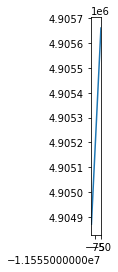

In [55]:
gpd_pt.plot()

In [92]:
gpd_pt.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [56]:
gpd_pt.is_valid

0    True
dtype: bool

In [91]:
spacing = gpd_pt.geometry[0].length/100.
spacing

7.979649728265518

In [89]:
result = []
line = gpd_pt.geometry[0]
type(line)
length = line.length
print(length)
d = 0.0
# point = line.interpolate(d)
# print(point)
# d += spacing
# point = line.interpolate(d)
# print(point)
# d1 = np.linspace(0,length, 100)
# print(d1)
# point = line.interpolate(d1)
while d < length:
    point = line.interpolate(d)
    result.append((point.x, point.y))
    d += spacing[0]
    
point = line.interpolate(length)
result.append((point.x, point.y))

print(result, type(result))
print(np.asarray(result)[:][0])

797.9649728265518
[(-11555050.75278105, 4905664.091696049), (-11555051.139059683, 4905656.121401287), (-11555051.525338316, 4905648.151106523), (-11555051.91161695, 4905640.180811761), (-11555052.297895582, 4905632.210516999), (-11555052.684174215, 4905624.240222236), (-11555053.070452848, 4905616.269927473), (-11555053.456731481, 4905608.29963271), (-11555053.843010115, 4905600.329337948), (-11555054.229288748, 4905592.359043186), (-11555054.61556738, 4905584.388748422), (-11555055.001846014, 4905576.41845366), (-11555055.388124647, 4905568.448158897), (-11555055.77440328, 4905560.477864135), (-11555056.160681913, 4905552.507569372), (-11555056.546960546, 4905544.537274609), (-11555056.933239179, 4905536.566979847), (-11555057.319517812, 4905528.5966850845), (-11555057.705796445, 4905520.626390321), (-11555058.092075078, 4905512.656095559), (-11555058.47835371, 4905504.685800796), (-11555058.864632344, 4905496.715506034), (-11555059.250910977, 4905488.745211271), (-11555059.63718961, 

In [94]:
from nldi_xstool.nldi_xstool import getXSAtEndPts

In [95]:
test = getXSAtEndPts(ls, 100)

geom: [(40.272798, -103.800787), (40.267335, -103.801134)] numpts: 100 file: None
LINESTRING (-103.800787 40.272798, -103.801134 40.267335)
     name                                           geometry
0  xspath  LINESTRING (-103.80079 40.27280, -103.80113 40...
     name                                           geometry
0  xspath  LINESTRING (-11555050.753 4905664.092, -115550...
     name                                           geometry
0  xspath  LINESTRING (-11555050.753 4905664.092, -115550... 100


In [99]:
test

,elevation,geometry
z,,
0,1300.583041,POINT (-103.80079 40.27280)
1,1300.719080,POINT (-103.80079 40.27274)
2,1300.807615,POINT (-103.80079 40.27269)
3,1300.807748,POINT (-103.80080 40.27263)
4,1300.711975,POINT (-103.80080 40.27258)
...,...,...
96,1301.410560,POINT (-103.80112 40.26755)
97,1301.398750,POINT (-103.80112 40.26750)
98,1301.416394,POINT (-103.80113 40.26744)


<AxesSubplot:xlabel='z'>

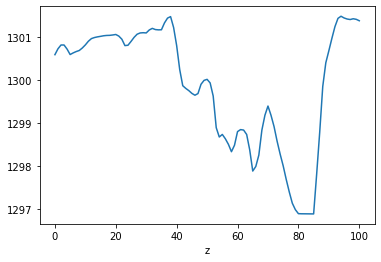

In [100]:
test.elevation.plot()

<AxesSubplot:>

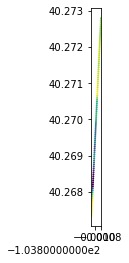

In [104]:
test.plot(column='elevation', markersize=1)

In [62]:
p1 = gpd_pt.geometry[0].coords[0]
p2 = gpd_pt.geometry[0].coords[1]
dx = (p1[0]-p2[0])/100.0
dy = (p1[1]-p2[1])/100.0

In [63]:
print(dx, dy)

0.38627863306552174 7.970294762644917


In [ ]:
for x in line